In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt

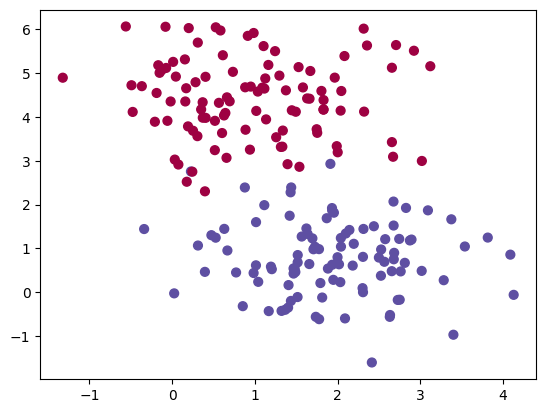

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
import time
from IPython import display
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [15]:
def activation(x):
        if len(x.shape) == 1:
            n_classes = 2
        else:
            n_classes = x.shape[1]
        
        if n_classes < 3:
            return np.where(x > 0, 1, 0)
        else:
            return np.argmax(x, axis=1)
    
def perceptron(x, w):
        return activation(x @ w)

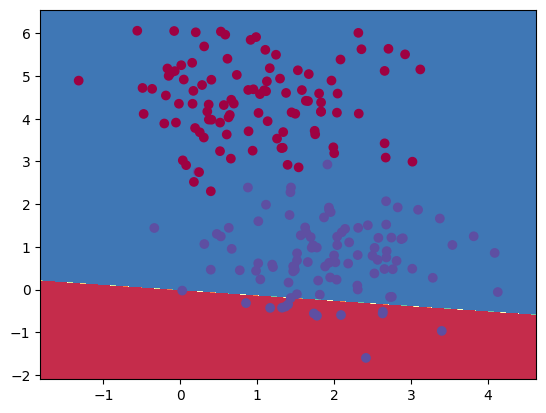

In [6]:
x = np.linspace(-5, 5)
plot_decision_boundary(lambda x: perceptron(x, w))

In [2]:
def plot_decision_boundary_bias(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 #646 0.01 steps on the X axis
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 #866 0.01 steps on the Y axis
                                                          #646*866 = 559436 points on the grid
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    all_points = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]
    Z = pred_func(all_points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()    

In [7]:
def y_encoding(y, classes):
    n_classes = len(classes)
    n_rows = y.shape[0]
    if n_classes < 3:
        return y
    else:
        one_hot_classes = np.array([])
        for c in classes:
            class_ = np.array([1 if c == i else 0 for i in y])
            class_= class_.reshape((n_rows,1))
            if not one_hot_classes.any():
                one_hot_classes = class_
            else:
                one_hot_classes = np.concatenate([one_hot_classes, class_], axis=1)
        y = one_hot_classes
        return y

In [20]:
class Perceptron:
    
    
    def train(self, x, y, n_iter = 200, LR = 2):
        n_rows = x.shape[0]
        n_features = x.shape[1]
        
        classes = np.unique(y)
        n_classes = len(classes)    
            
        if n_classes > 2:
            w = 2*np.random.rand(n_features+1, n_classes)   
        else:
            w = 2*np.random.rand(n_features+1)
            
        y = y_encoding(y, classes)      
        
        x = np.c_[np.ones(n_rows), x]
       
        previous_error = 999
        for iteration in range(n_iter):
            pred = perceptron(x,w)
            
            pred = y_encoding(pred, classes) 
            
            errors = y-pred
       
            avg_error = np.mean(np.abs(errors))
            if (avg_error - previous_error) >= 0:
                LR = LR*0.95
                
            previous_error = avg_error     
            
            if LR < 0.0001:
                return
            
            w = w + LR*np.dot(x.T,errors)
            
            # draw result
            display.clear_output(wait=True)
            plot_decision_boundary_bias(lambda x: perceptron(x, w))
            display.display("Error:" + str(avg_error) + ', LR:' + str(LR))
            time.sleep(0.5)
            
        self.w = w
        return pred      

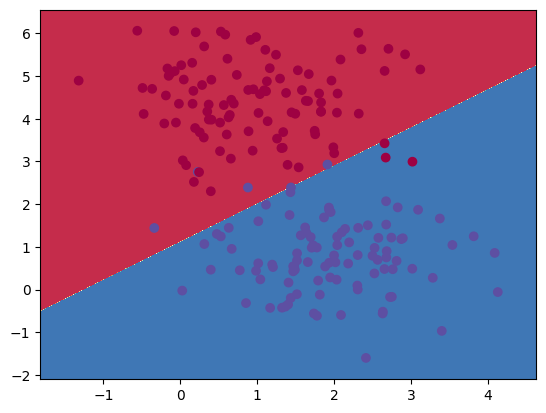

'Error:0.04, LR:0.0027275759107716255'

array([ 3496.54311334,  2078.07745015,  4949.24241342,  2825.66855836,
       -3618.27177082])

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0])

In [33]:
p = Perceptron()
p.train(X,y)

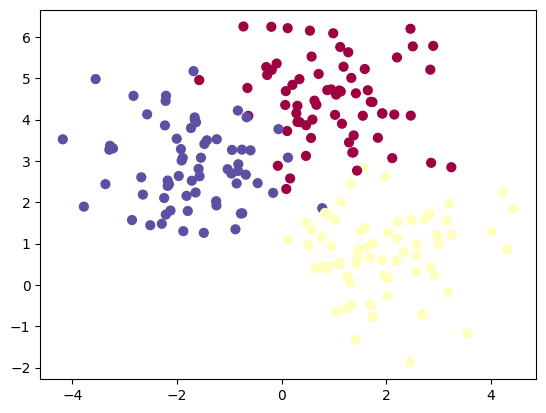

In [13]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

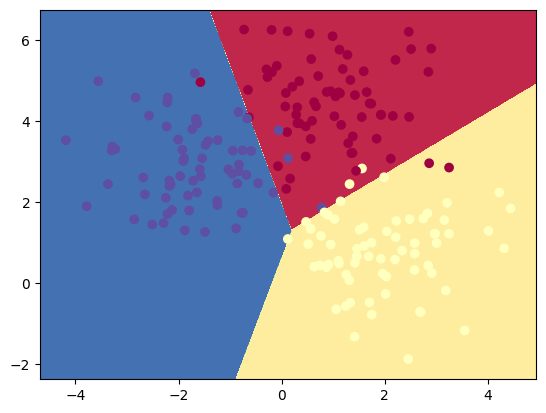

'Error:0.03333333333333333, LR:0.009341364515150505'

array([[ 2136.24860994, -8371.76303674,  6241.7791469 ],
       [ 4095.66143673, -3409.45693884,  -677.13065007],
       [ 4611.99300545, -2468.88481222, -2133.32183055],
       [ 1919.56244008, -7183.91876769,  5270.44157809],
       [ 5844.84390766, -3468.2196471 , -2365.38175746]])

In [40]:
p = Perceptron()
pred = p.train(X,y)

In [44]:
pred[5:10]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

Softmax:
https://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html
**softmax is multinomial logistic regression**

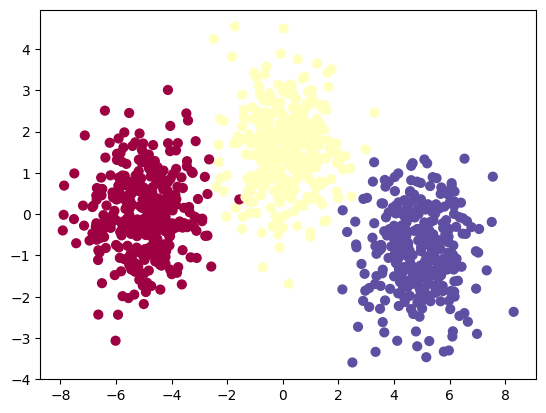

In [4]:
np.random.seed(0)
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = sklearn.datasets.make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

Cross Entropy Gradient Descent: https://www.python-unleashed.com/post/derivation-of-the-binary-cross-entropy-loss-gradient

In [16]:
class Softmax:
    
    def _softmax(self, x, w):
        z = x @ w
        ez = np.exp(z)
        sum_of_exp = np.sum(ez, axis=1)
        softmax = ez / sum_of_exp.reshape(x.shape[0],1)
        return softmax
        
    
    def train(self, x, y, n_iter = 2000, LR = 0.01):
        n_rows = x.shape[0]
        n_features = x.shape[1]
        
        classes = np.unique(y)
        n_classes = len(classes)    
            
        if n_classes > 2:
            self.w = 2*np.random.rand(n_features+1, n_classes)   
        else:
            self.w = 2*np.random.rand(n_features+1)
            
        y = y_encoding(y, classes)      
        
        x = np.c_[np.ones(n_rows), x]
       
        previous_error = 999
        for iteration in range(n_iter):
            pred = self._softmax(x,self.w)
            
            
            errors = y-pred
           
            avg_error = np.mean(np.abs(errors))
            if (avg_error - previous_error) >= 0:
                LR = LR*0.95
                
            previous_error = avg_error     
            
            if LR < 0.0001:
                return
            
            self.w = self.w + LR*np.dot(x.T,errors)
            
#             # draw result
#             display.clear_output(wait=True)
#             #display.display("Error:" + str(avg_error) + ', LR:' + str(LR))
#             time.sleep(0.5)
            
        
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return np.argmax(self._softmax(X, self.w), axis=1)

In [17]:
s = Softmax()
s.train(X,y, LR=0.01)
s.w

array([[-3.16301181,  9.51398465, -4.33107939],
       [-5.23769374,  0.55740118,  7.17896434],
       [ 1.66718238,  3.32349336, -1.93263542]])

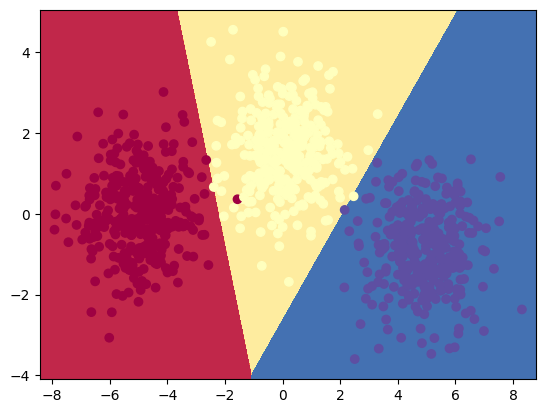

In [18]:
plot_decision_boundary(s.predict)